In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

labels_bih_long = {0: "N: Normal beat", 
                 1: "S: Supraventricular premature beat",
                 2: "V: Premature ventricular contraction",
                 3: "F: Fusion of ventricular and normal beat",
                 4: "Q: Unclassifiable beat"}
labels_bih = {0: "N", 
                 1: "S",
                 2: "V",
                 3: "F",
                 4: "Q"}
labels_ptb = {0: "normal",
              1: "abnormal"}



In [5]:
# Import of all Data
bih_test = pd.read_csv("..\\data\\mitbih_test.csv", header=None)
bih_train= pd.read_csv("..\\data\\mitbih_train.csv", header=None)
ptbdb_abnormal = pd.read_csv("..\\data\\ptbdb_abnormal.csv", header=None)
ptbdb_normal = pd.read_csv("..\\data\\ptbdb_normal.csv", header=None)
ptb = pd.merge(ptbdb_abnormal, ptbdb_normal, how="outer")
bih = pd.merge(bih_test, bih_train, how="outer")

Datastructure:

PTB: last Column is the class (0: Normal, 1: Abnormal)
PTB: Test: 21892 rows, Train: 87554 rows -> Train-Test-Split of 0.8
PTB: ~ 37% of the data is zero-padding

BIH: last column is the class ('N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4)
BIH: Normal: 4046, Abnormal: 10506 -> 27.8% Normal
BIH: ~ 40% of the data is zero-padding

BOTH: Column 0...187: Time signal of a single ECG-heartbeat
BOTH: zero-padding after complete heartbeat
BOTH: All columns are of type "float64"


In [6]:
ptb_zeros = (ptb.iloc[:, :-1] == 0).sum().sum()/(ptb.shape[0]*(ptb.shape[1]-1))
print(f"PTB: Zero-Padding: {int(100*ptb_zeros)}%")
bih_zeros = (bih.iloc[:, :-1] == 0).sum().sum()/(bih.shape[0]*(bih.shape[1]-1))
print(f"BIH: Zero-Padding: {int(100*bih_zeros)}%")


PTB: Zero-Padding: 37%
BIH: Zero-Padding: 40%


Check for Valid-Data:

- Data does not involve any NaN-Values or String-Values 
  --> Data is "clean" with no missing values
- Data classes are as described (0, 1) or (0, 1, 2, 3, 4) with no other values
- Heart beats are normalized (between 0 ... 1) -> no outliers (at least not after the normalization)


- How to check for outliers inside the normalized data?????

Code is in cell below

In [12]:
print(f"BIH: Only float values: {(bih.iloc[:,:].dtypes == 'float64').all()}")

SyntaxError: f-string: unmatched '(' (2543387911.py, line 1)

In [13]:
# Search vor not valid rows:
print(f"BIH: NA-Values: {bih.isna().sum().sum()}")
print(f"PTB: NA-Values: {ptb.isna().sum().sum()}")
print(f"BIH: Only float values: {(bih.iloc[:,:].dtypes == 'float64').all()}")
print(f"PTB: Only float values: {(ptb.iloc[:,:].dtypes == 'float64').all()}")
print("True equal to no string-Values")
print("--> No NaN-Values, no String-Values -> no data cleansing necessary")
print(f"BIH: Unique Classes: {bih.iloc[:,-1].unique()}")
print(f"PTB: Unique Classes: {ptb.iloc[:,-1].unique()}")


print(f"PTB: Maximum-Value across all rows: {ptb.iloc[:, :-1].max().max()}")
print(f"PTB: Minimum-Value across all rows: {ptb.iloc[:, :-1].min().min()}")
print(f"BIH: Maximum-Value across all rows: {bih.iloc[:, :-1].max().max()}")
print(f"BIH: Minimum-Value across all rows: {bih.iloc[:, :-1].min().min()}")
print("Maximum-Minimum: 0...1 --> all data normalized, no outlier (at least not after the normalization!)")

bih.iloc[:,-1].dtype

BIH: NA-Values: 0
PTB: NA-Values: 0
BIH: Only float values: True
PTB: Only float values: True
True equal to no string-Values
--> No NaN-Values, no String-Values -> no data cleansing necessary
BIH: Unique Classes: [0. 2. 1. 3. 4.]
PTB: Unique Classes: [1. 0.]
PTB: Maximum-Value across all rows: 1.0
PTB: Minimum-Value across all rows: 0.0
BIH: Maximum-Value across all rows: 1.0
BIH: Minimum-Value across all rows: 0.0
Maximum-Minimum: 0...1 --> all data normalized, no outlier (at least not after the normalization!)


dtype('float64')

Class distribution: 

BIH: Train/Test-Dataset is equaly distributed among the classes
BIH: High amount (7.3%) of unclassifiable heartbeat signals (Q)
BIH: Mostly normal signals (82.8%) (N)
BIH: --> The "sick-classes" are underrepresented 

PTB: ~ 27.8% normal, ~72.2% abnormal

Both Datasets have different classes 


code is in cells below

Text(0.5, 1.0, 'Distribution PTB')

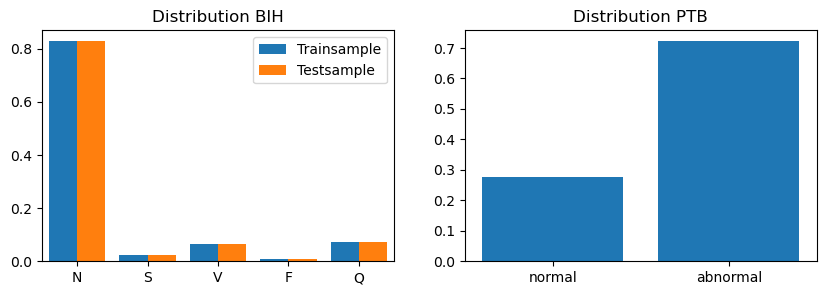

In [14]:
fig, axs = plt.subplots(figsize=(10,3) , ncols=2)
plt.title("Class-Distribution")
axs[0].hist([bih_train.iloc[:,-1], bih_test.iloc[:,-1]], bins=np.arange(0, 5.5), density=True)
# plt.hist(mitbih_train.iloc[:,-1], bins=np.arange(-0.5, 4.5), density=True, stacked=True, histtype='barstacked')
axs[0].legend(["Trainsample", "Testsample"])
axs[0].set_xlim([0, 5])
axs[0].set_xticks(np.array(list(labels_bih.keys()))+0.5, list(labels_bih.values()))
axs[0].set_title("Distribution BIH")

axs[1].hist(ptb.iloc[:,-1], bins=[0, 1, 2], density=True, rwidth=0.8)
# plt.hist(mitbih_train.iloc[:,-1], bins=np.arange(-0.5, 4.5), density=True, stacked=True, histtype='barstacked')
# axs[1].legend(["Trainsample", "Testsample"])
axs[1].set_xlim([0, 2])
axs[1].set_xticks(np.array(list(labels_ptb.keys()))+0.5, list(labels_ptb.values()))
axs[1].set_title("Distribution PTB")



Text(0.5, 1.0, 'Distribution PTB')

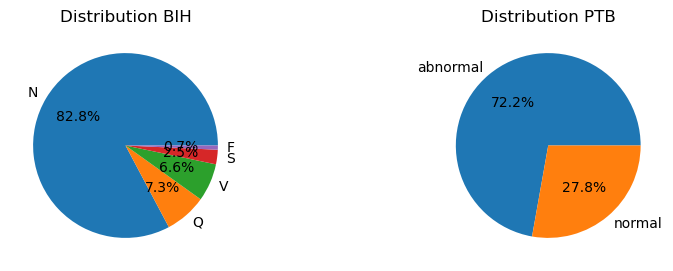

In [15]:

# alternative as PIE graph
fig, axs = plt.subplots(figsize=(10,3) , ncols=2)
plt.title("Class-Distribution")
axs[0].pie(bih.iloc[:,-1].value_counts(), autopct='%1.1f%%',
            normalize=True, labels=["N", "Q", "V", "S", "F"])
axs[0].set_title("Distribution BIH")

axs[1].pie(ptb.iloc[:,-1].value_counts(), autopct='%1.1f%%', normalize=True,
           labels=['abnormal', 'normal'])
# plt.hist(mitbih_train.iloc[:,-1], bins=np.arange(-0.5, 4.5), density=True, stacked=True, histtype='barstacked')
# axs[1].legend(["Trainsample", "Testsample"])
#axs[1].set_xticks(np.array(list(labels_ptb.keys()))+0.5, list(labels_ptb.values()))
axs[1].set_title("Distribution PTB")


Heartbeat-signals
- Strong difference in the timesignals
- average signal has a lot of zero-padding

Code in cells below

Text(0, 0.5, 'ECG-Signal / a.u.')

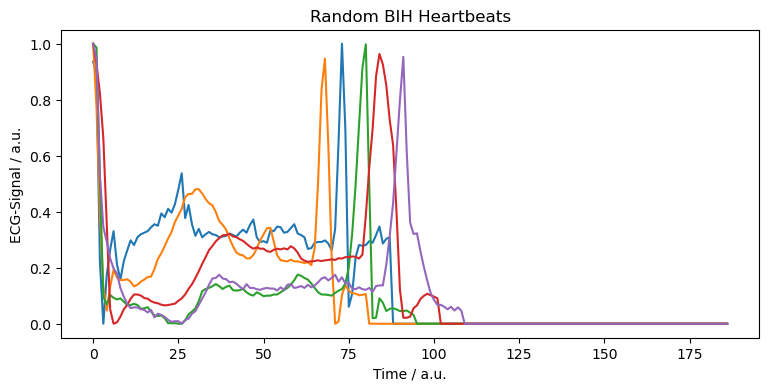

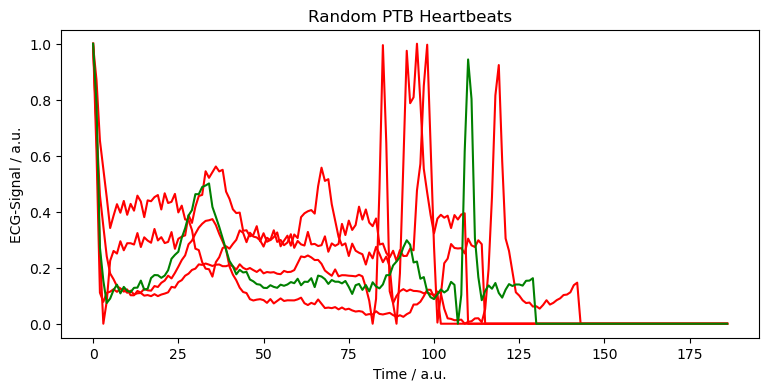

In [29]:
# Heartbeat signals BIH
plt.figure(figsize=(9,4))
plt.title("Random BIH Heartbeats")
for idx in np.random.randint(bih.shape[0], size=5):
    plt.plot(bih.iloc[idx, 0:-1])
plt.xlabel("Time / a.u.")
plt.ylabel("ECG-Signal / a.u.")

plt.figure(figsize=(9,4))
plt.title("Random PTB Heartbeats")
for idx in np.random.randint(ptb.shape[0], size=5):
    color ='g' if ptb.iloc[idx, -1] == 0 else 'r'
    plt.plot(ptb.iloc[idx, 0:-1], color=color)
plt.xlabel("Time / a.u.")
plt.ylabel("ECG-Signal / a.u.")
